In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3001

zmin = 3.5
zmax = 8.1

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

In [3]:
from scipy.interpolate import LinearNDInterpolator


In [4]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [5]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [6]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [7]:
from scipy.integrate import quad_vec

In [8]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3001/3001 [11:04<00:00,  4.52it/s] 


In [9]:
import matplotlib.pyplot as plt

In [10]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax), unfiltered_auto)

1.3079763980295357e-05 1.3079763980295357e-05


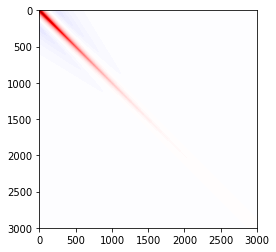

1.3089033171302076e-05 1.3089033171302076e-05


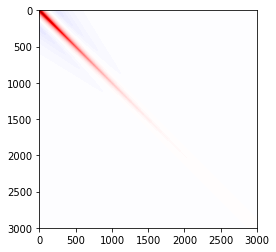

1.3099002688746936e-05 1.3099002688746936e-05


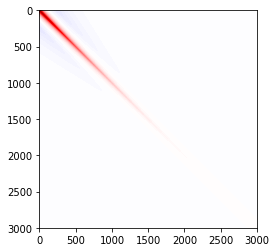

1.3109701943801281e-05 1.3109701943801281e-05


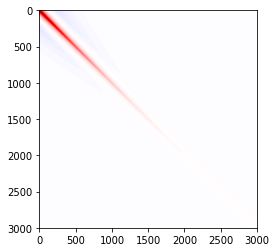

1.3121156901143853e-05 1.3121156901143853e-05


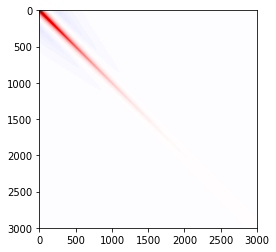

1.313338876713014e-05 1.313338876713014e-05


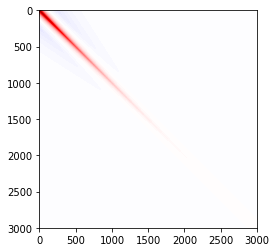

1.314641237184028e-05 1.314641237184028e-05


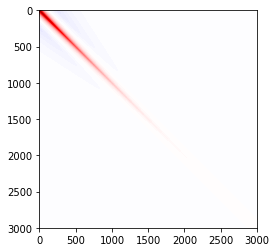

1.3160234743124842e-05 1.3160234743124842e-05


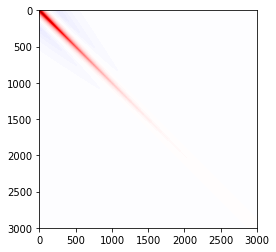

1.3174853353905862e-05 1.3174853353905862e-05


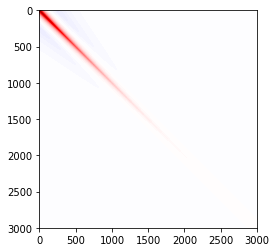

1.3190253935778901e-05 1.3190253935778901e-05


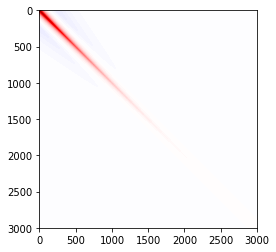

1.320640787170637e-05 1.320640787170637e-05


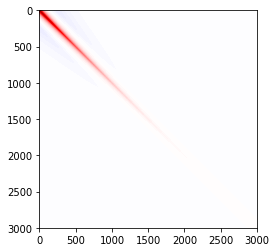

1.322326891669333e-05 1.322326891669333e-05


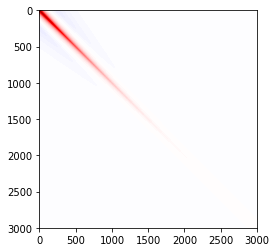

1.3240770466908567e-05 1.3240770466908567e-05


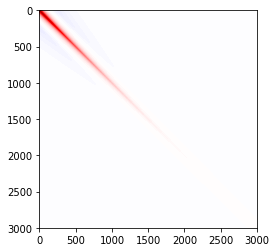

1.3258821971735675e-05 1.3258821971735675e-05


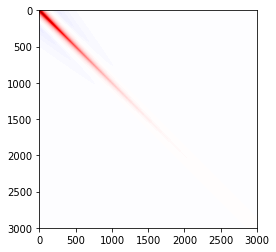

1.327730488598825e-05 1.327730488598825e-05


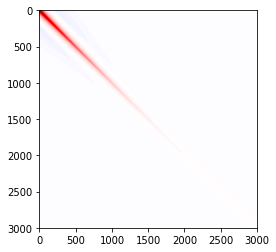

1.329606839897974e-05 1.329606839897974e-05


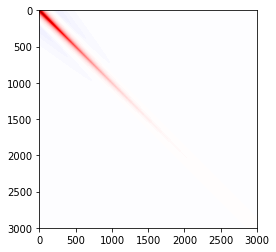

1.3314924561535653e-05 1.3314924561535653e-05


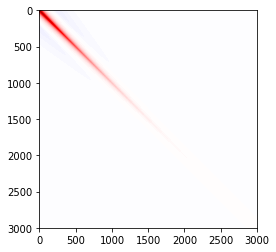

1.3333643161588448e-05 1.3333643161588448e-05


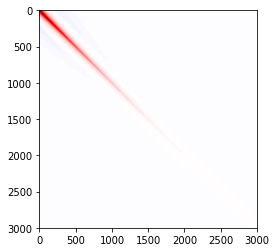

1.3351946352718837e-05 1.3351946352718837e-05


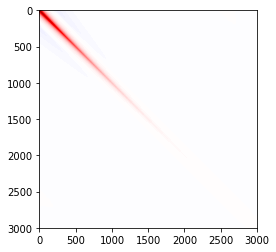

1.3369502707055865e-05 1.3369502707055865e-05


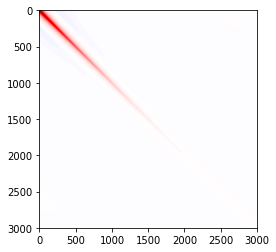

1.3385921182804517e-05 1.3385921182804517e-05


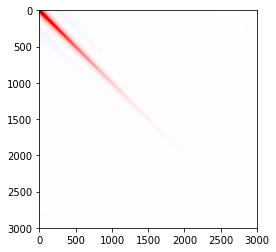

1.340074532890877e-05 1.340074532890877e-05


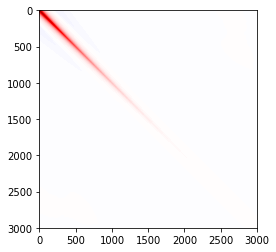

1.3413446928536016e-05 1.3413446928536016e-05


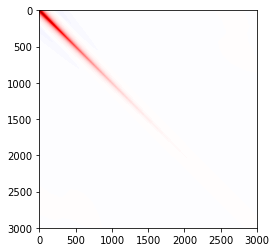

1.342342053175915e-05 1.342342053175915e-05


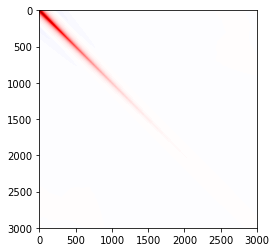

1.3429978516571068e-05 1.3429978516571068e-05


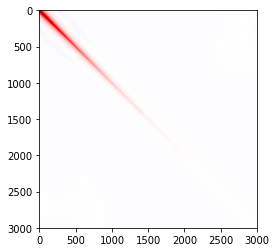

1.3432347145914312e-05 1.3432347145914312e-05


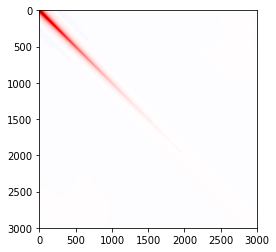

1.3429664188386412e-05 1.3429664188386412e-05


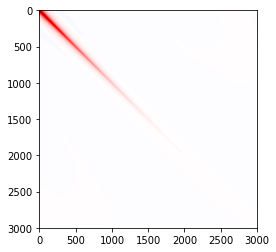

1.3420979141886731e-05 1.3420979141886731e-05


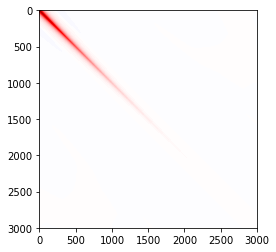

1.3405256222871553e-05 1.3405256222871553e-05


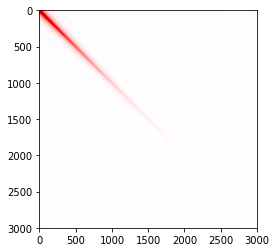

1.3381381779379562e-05 1.3381381779379562e-05


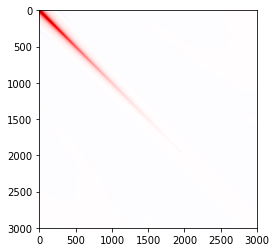

1.3348176166913419e-05 1.3348176166913419e-05


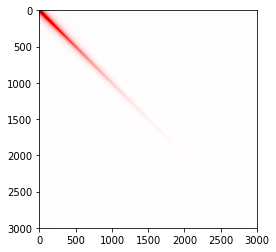

1.330441331849942e-05 1.330441331849942e-05


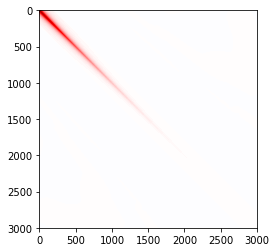

1.3248846680558928e-05 1.3248846680558928e-05


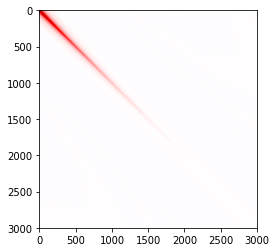

1.3180244547362145e-05 1.3180244547362145e-05


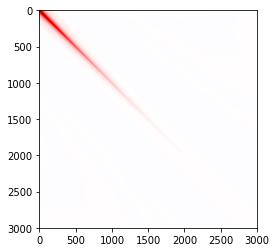

1.3097435507888084e-05 1.3097435507888084e-05


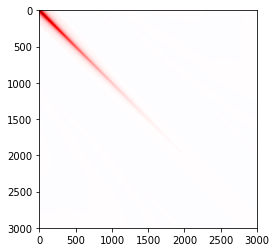

1.2999363649502655e-05 1.2999363649502655e-05


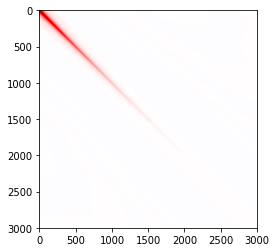

1.2885154562822957e-05 1.2885154562822957e-05


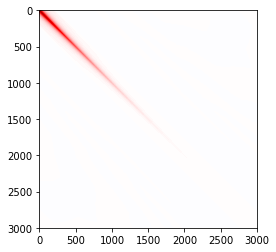

1.275418861800044e-05 1.275418861800044e-05


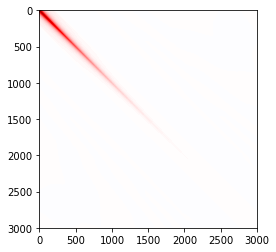

1.2606181570699844e-05 1.2606181570699844e-05


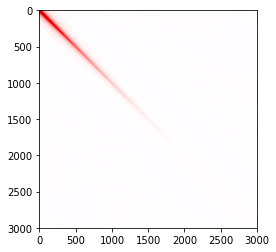

1.244126364479893e-05 1.244126364479893e-05


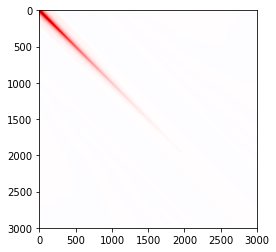

1.2260052454724246e-05 1.2260052454724246e-05


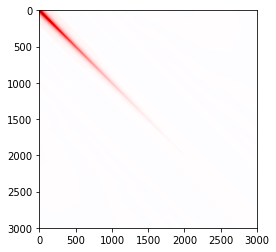

1.206370594748191e-05 1.206370594748191e-05


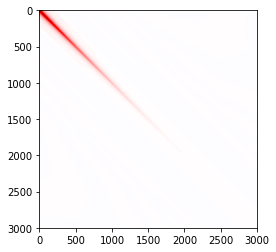

1.1853942795276619e-05 1.1853942795276619e-05


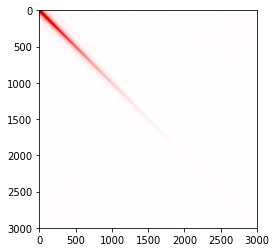

1.163301124587625e-05 1.163301124587625e-05


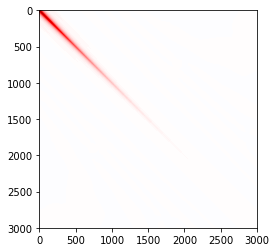

1.1403584141126634e-05 1.1403584141126634e-05


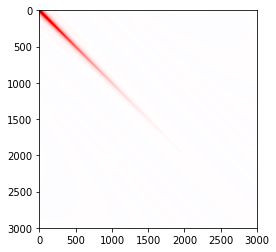

1.1168541811004696e-05 1.1168541811004696e-05


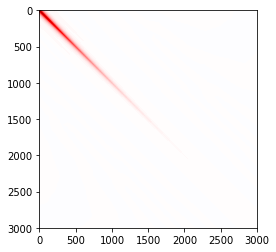

1.0930483954294738e-05 1.0930483954294738e-05


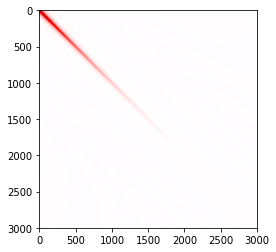

1.0692756931843697e-05 1.0692756931843697e-05


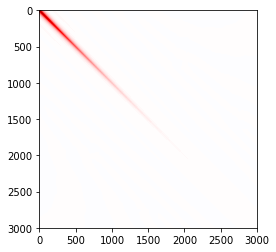

1.0457839288775212e-05 1.0457839288775212e-05


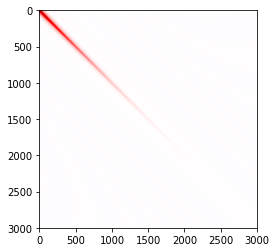

1.022637551494689e-05 1.022637551494689e-05


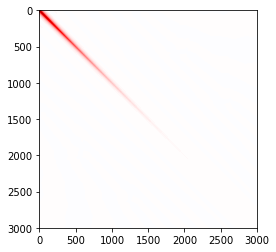

9.99710035832705e-06 9.99710035832705e-06


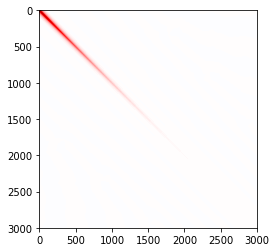

9.767003783161533e-06 9.767003783161533e-06


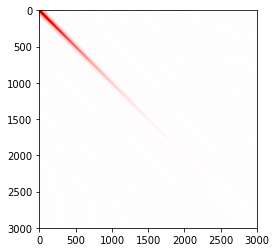

9.531932422652451e-06 9.531932422652451e-06


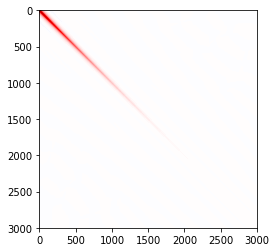

9.287676989019419e-06 9.287676989019419e-06


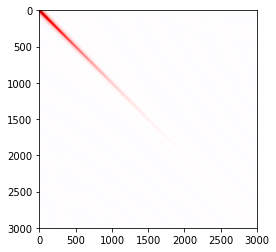

9.02473844659771e-06 9.02473844659771e-06


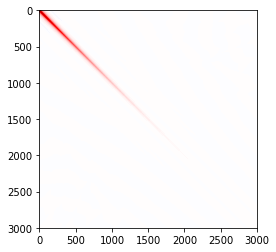

8.736963590458761e-06 8.736963590458761e-06


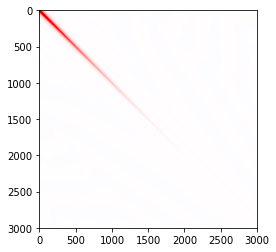

8.42137630385291e-06 8.42137630385291e-06


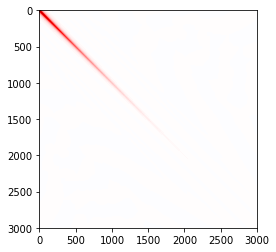

8.080180658528287e-06 8.080180658528287e-06


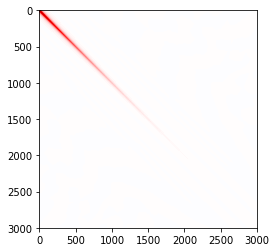

7.722605674629565e-06 7.722605674629565e-06


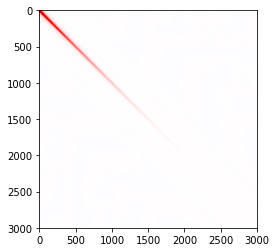

7.363410833873089e-06 7.363410833873089e-06


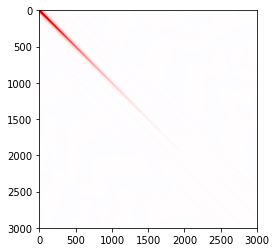

7.019218340063005e-06 7.019218340063005e-06


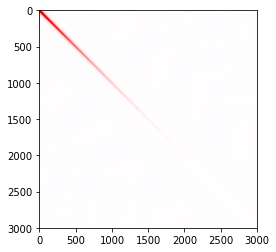

6.7040744818753535e-06 6.7040744818753535e-06


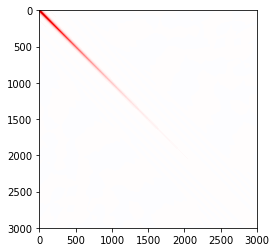

6.423767164371815e-06 6.423767164371815e-06


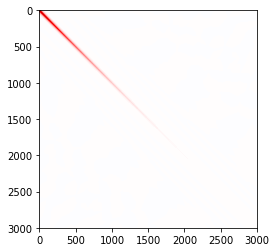

6.170931869830637e-06 6.170931869830637e-06


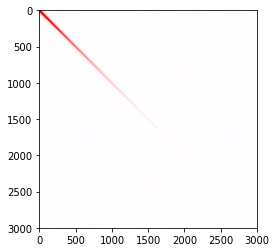

5.926527568416834e-06 5.926527568416834e-06


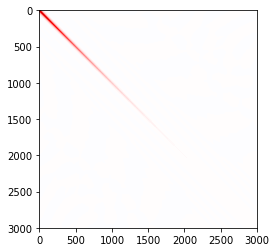

5.6672007824298415e-06 5.6672007824298415e-06


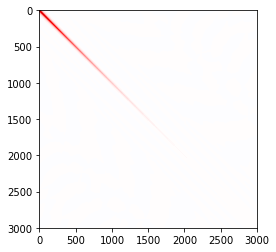

5.3772213969945785e-06 5.3772213969945785e-06


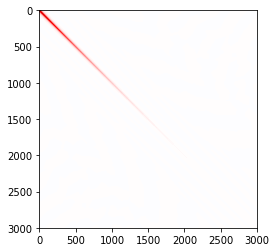

5.065097027784267e-06 5.065097027784267e-06


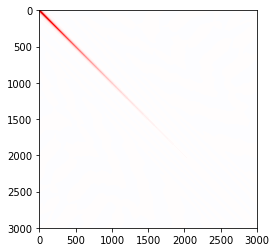

4.7607603044395485e-06 4.7607603044395485e-06


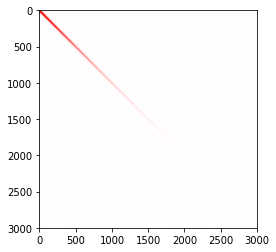

4.491615921894949e-06 4.491615921894949e-06


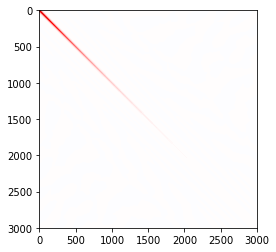

4.263324479563948e-06 4.263324479563948e-06


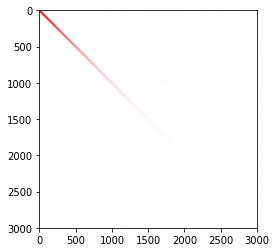

4.0502239343219475e-06 4.0502239343219475e-06


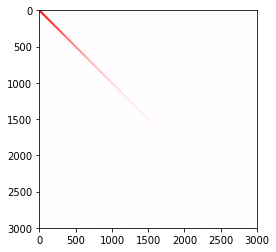

3.8217770176763985e-06 3.8217770176763985e-06


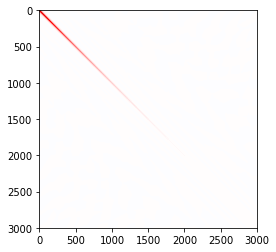

3.575917471034534e-06 3.575917471034534e-06


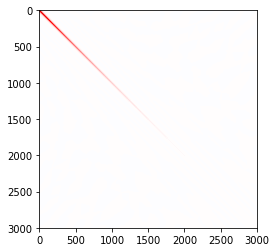

3.342783860556657e-06 3.342783860556657e-06


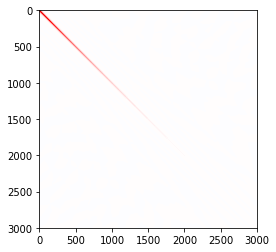

3.143224560821744e-06 3.143224560821744e-06


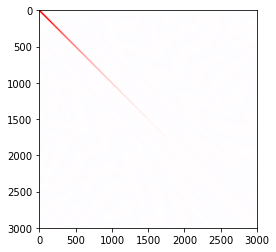

2.9593801331859e-06 2.9593801331859e-06


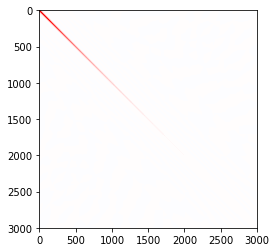

2.7671329921941116e-06 2.7671329921941116e-06


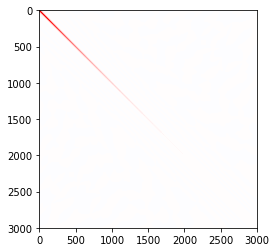

2.577337557068958e-06 2.577337557068958e-06


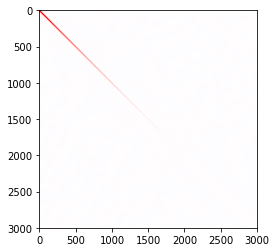

2.4093458229586147e-06 2.4093458229586147e-06


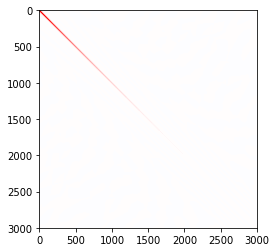

2.2517642683539896e-06 2.2517642683539896e-06


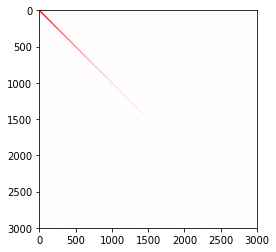

2.0940498313674965e-06 2.0940498313674965e-06


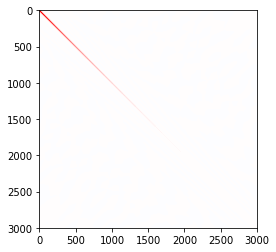

1.9483574370880744e-06 1.9483574370880744e-06


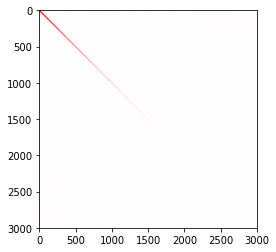

1.8131998168198735e-06 1.8131998168198735e-06


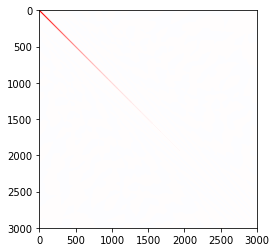

1.6823465673583786e-06 1.6823465673583786e-06


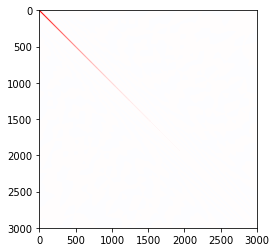

1.5612476394956181e-06 1.5612476394956181e-06


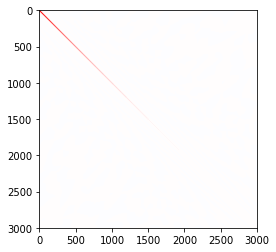

1.4469890387238146e-06 1.4469890387238146e-06


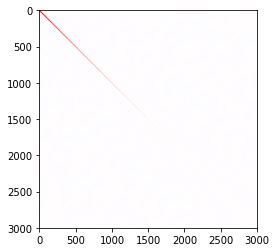

1.339648004560933e-06 1.339648004560933e-06


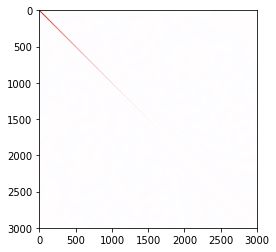

1.2393971242457593e-06 1.2393971242457593e-06


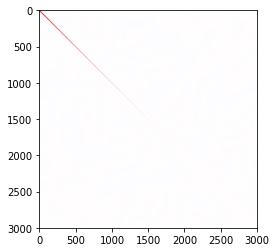

1.1453930836417779e-06 1.1453930836417779e-06


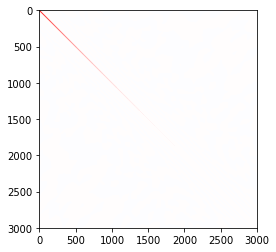

1.0576944474483923e-06 1.0576944474483923e-06


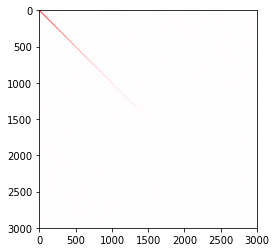

9.758350653749506e-07 9.758350653749506e-07


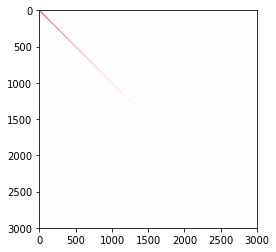

8.995776851043021e-07 8.995776851043021e-07


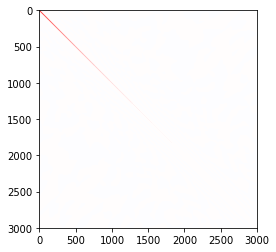

8.285519964431049e-07 8.285519964431049e-07


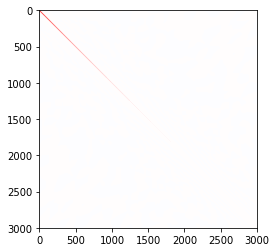

7.625189018444631e-07 7.625189018444631e-07


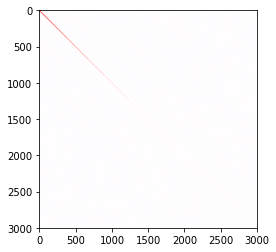

7.012193921226425e-07 7.012193921226425e-07


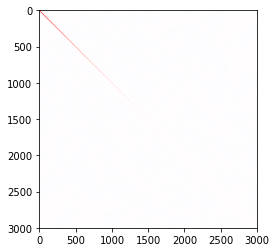

6.44374158154453e-07 6.44374158154453e-07


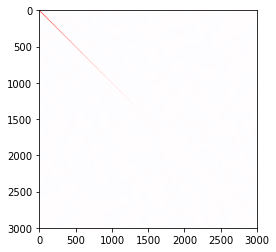

5.917048667294591e-07 5.917048667294591e-07


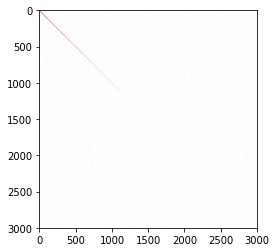

5.429481628826033e-07 5.429481628826033e-07


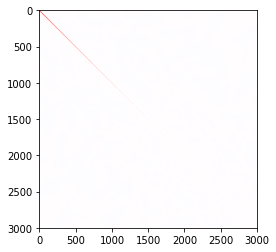

4.978565714646588e-07 4.978565714646588e-07


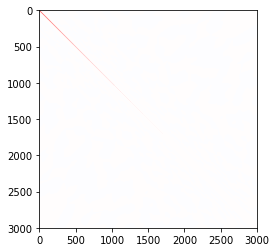

In [11]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()